<h1 align="center">Traffic Sign Recognition Using Deep Learning</h1>

## Importing Libraries

In [330]:
# importing Libraries 
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

### Loading the Data

In [279]:
# Loading images and converting them into a numpy array
height = 32
width = 32
channels = 3
classes = 43
n_inputs = height * width*channels
data=[]
labels=[]


for i in range(classes) :
    path = "dataset/train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)



dataset/train/0/
dataset/train/1/
dataset/train/2/
dataset/train/3/
dataset/train/4/
dataset/train/5/
dataset/train/6/
dataset/train/7/
dataset/train/8/
dataset/train/9/
dataset/train/10/
dataset/train/11/
dataset/train/12/
dataset/train/13/
dataset/train/14/
dataset/train/15/
dataset/train/16/
dataset/train/17/
dataset/train/18/
dataset/train/19/
dataset/train/20/
dataset/train/21/
dataset/train/22/
dataset/train/23/
dataset/train/24/
dataset/train/25/
dataset/train/26/
dataset/train/27/
dataset/train/28/
dataset/train/29/
dataset/train/30/
dataset/train/31/
dataset/train/32/
dataset/train/33/
dataset/train/34/
dataset/train/35/
dataset/train/36/
dataset/train/37/
dataset/train/38/
dataset/train/39/
dataset/train/40/
dataset/train/41/
dataset/train/42/


<h2>Data Exploration</h2>

In [280]:
X = Cells
y = labels

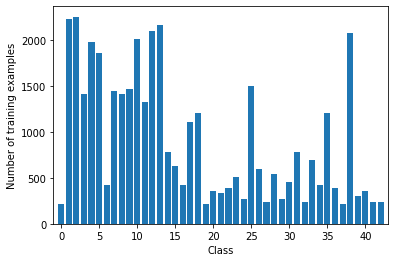

In [281]:
%matplotlib inline

class_indices, class_counts = np.unique(y, return_counts=True)

# display the distribution of classes in the training set
plt.bar(np.arange(43), class_counts, align='center')
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()


Class 0:  210 samples
[199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209]


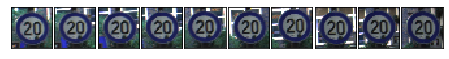

--------------------------------------------------------------------------------------

Class 1:  2220 samples
[2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429]


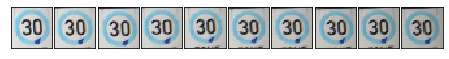

--------------------------------------------------------------------------------------

Class 2:  2250 samples
[4669, 4670, 4671, 4672, 4673, 4674, 4675, 4676, 4677, 4678, 4679]


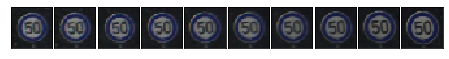

--------------------------------------------------------------------------------------

Class 3:  1410 samples
[6079, 6080, 6081, 6082, 6083, 6084, 6085, 6086, 6087, 6088, 6089]


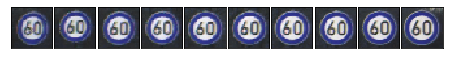

--------------------------------------------------------------------------------------

Class 4:  1980 samples
[8059, 8060, 8061, 8062, 8063, 8064, 8065, 8066, 8067, 8068, 8069]


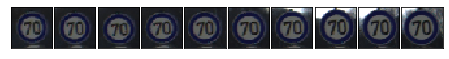

--------------------------------------------------------------------------------------

Class 5:  1860 samples
[9919, 9920, 9921, 9922, 9923, 9924, 9925, 9926, 9927, 9928, 9929]


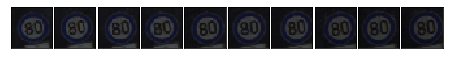

--------------------------------------------------------------------------------------

Class 6:  420 samples
[10339, 10340, 10341, 10342, 10343, 10344, 10345, 10346, 10347, 10348, 10349]


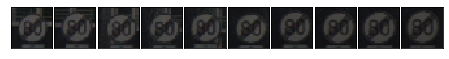

--------------------------------------------------------------------------------------

Class 7:  1440 samples
[11779, 11780, 11781, 11782, 11783, 11784, 11785, 11786, 11787, 11788, 11789]


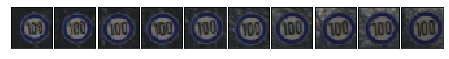

--------------------------------------------------------------------------------------

Class 8:  1410 samples
[13189, 13190, 13191, 13192, 13193, 13194, 13195, 13196, 13197, 13198, 13199]


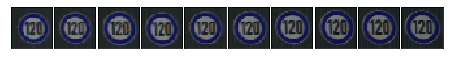

--------------------------------------------------------------------------------------

Class 9:  1470 samples
[14659, 14660, 14661, 14662, 14663, 14664, 14665, 14666, 14667, 14668, 14669]


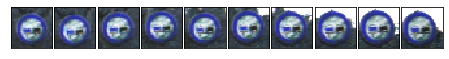

--------------------------------------------------------------------------------------

Class 10:  2010 samples
[16669, 16670, 16671, 16672, 16673, 16674, 16675, 16676, 16677, 16678, 16679]


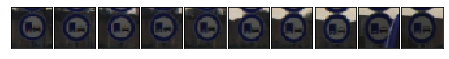

--------------------------------------------------------------------------------------

Class 11:  1320 samples
[17989, 17990, 17991, 17992, 17993, 17994, 17995, 17996, 17997, 17998, 17999]


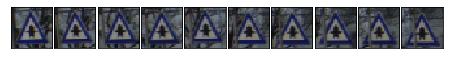

--------------------------------------------------------------------------------------

Class 12:  2100 samples
[20089, 20090, 20091, 20092, 20093, 20094, 20095, 20096, 20097, 20098, 20099]


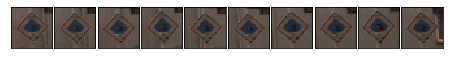

--------------------------------------------------------------------------------------

Class 13:  2160 samples
[22249, 22250, 22251, 22252, 22253, 22254, 22255, 22256, 22257, 22258, 22259]


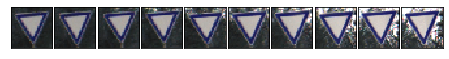

--------------------------------------------------------------------------------------

Class 14:  780 samples
[23029, 23030, 23031, 23032, 23033, 23034, 23035, 23036, 23037, 23038, 23039]


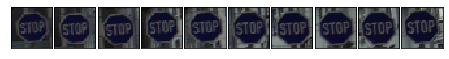

--------------------------------------------------------------------------------------

Class 15:  630 samples
[23659, 23660, 23661, 23662, 23663, 23664, 23665, 23666, 23667, 23668, 23669]


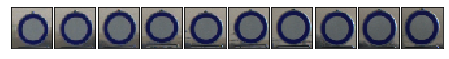

--------------------------------------------------------------------------------------

Class 16:  420 samples
[24079, 24080, 24081, 24082, 24083, 24084, 24085, 24086, 24087, 24088, 24089]


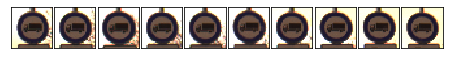

--------------------------------------------------------------------------------------

Class 17:  1110 samples
[25189, 25190, 25191, 25192, 25193, 25194, 25195, 25196, 25197, 25198, 25199]


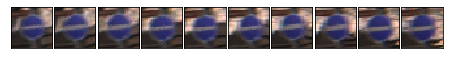

--------------------------------------------------------------------------------------

Class 18:  1200 samples
[26389, 26390, 26391, 26392, 26393, 26394, 26395, 26396, 26397, 26398, 26399]


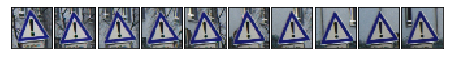

--------------------------------------------------------------------------------------

Class 19:  210 samples
[26599, 26600, 26601, 26602, 26603, 26604, 26605, 26606, 26607, 26608, 26609]


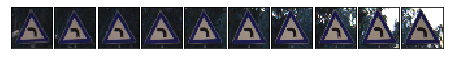

--------------------------------------------------------------------------------------

Class 20:  360 samples
[26959, 26960, 26961, 26962, 26963, 26964, 26965, 26966, 26967, 26968, 26969]


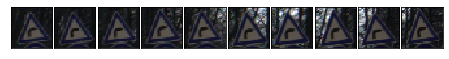

--------------------------------------------------------------------------------------

Class 21:  330 samples
[27289, 27290, 27291, 27292, 27293, 27294, 27295, 27296, 27297, 27298, 27299]


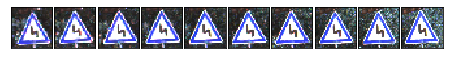

--------------------------------------------------------------------------------------

Class 22:  390 samples
[27679, 27680, 27681, 27682, 27683, 27684, 27685, 27686, 27687, 27688, 27689]


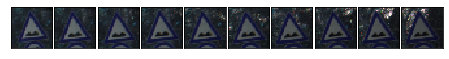

--------------------------------------------------------------------------------------

Class 23:  510 samples
[28189, 28190, 28191, 28192, 28193, 28194, 28195, 28196, 28197, 28198, 28199]


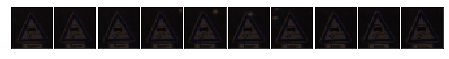

--------------------------------------------------------------------------------------

Class 24:  270 samples
[28459, 28460, 28461, 28462, 28463, 28464, 28465, 28466, 28467, 28468, 28469]


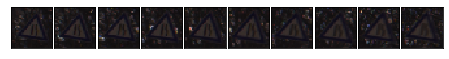

--------------------------------------------------------------------------------------

Class 25:  1500 samples
[29959, 29960, 29961, 29962, 29963, 29964, 29965, 29966, 29967, 29968, 29969]


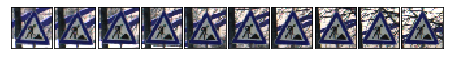

--------------------------------------------------------------------------------------

Class 26:  600 samples
[30559, 30560, 30561, 30562, 30563, 30564, 30565, 30566, 30567, 30568, 30569]


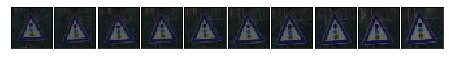

--------------------------------------------------------------------------------------

Class 27:  240 samples
[30799, 30800, 30801, 30802, 30803, 30804, 30805, 30806, 30807, 30808, 30809]


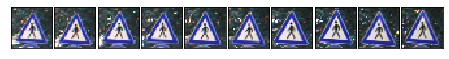

--------------------------------------------------------------------------------------

Class 28:  540 samples
[31339, 31340, 31341, 31342, 31343, 31344, 31345, 31346, 31347, 31348, 31349]


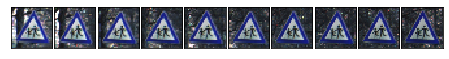

--------------------------------------------------------------------------------------

Class 29:  270 samples
[31609, 31610, 31611, 31612, 31613, 31614, 31615, 31616, 31617, 31618, 31619]


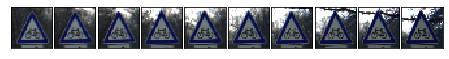

--------------------------------------------------------------------------------------

Class 30:  450 samples
[32059, 32060, 32061, 32062, 32063, 32064, 32065, 32066, 32067, 32068, 32069]


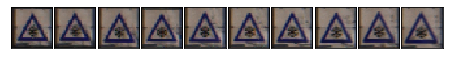

--------------------------------------------------------------------------------------

Class 31:  780 samples
[32839, 32840, 32841, 32842, 32843, 32844, 32845, 32846, 32847, 32848, 32849]


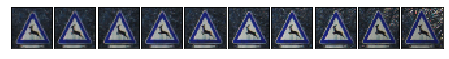

--------------------------------------------------------------------------------------

Class 32:  240 samples
[33079, 33080, 33081, 33082, 33083, 33084, 33085, 33086, 33087, 33088, 33089]


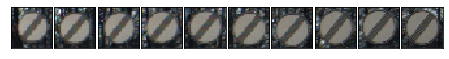

--------------------------------------------------------------------------------------

Class 33:  689 samples
[33768, 33769, 33770, 33771, 33772, 33773, 33774, 33775, 33776, 33777, 33778]


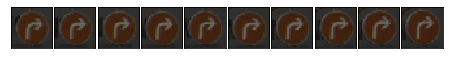

--------------------------------------------------------------------------------------

Class 34:  420 samples
[34188, 34189, 34190, 34191, 34192, 34193, 34194, 34195, 34196, 34197, 34198]


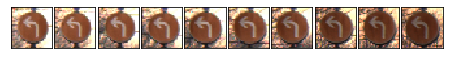

--------------------------------------------------------------------------------------

Class 35:  1200 samples
[35388, 35389, 35390, 35391, 35392, 35393, 35394, 35395, 35396, 35397, 35398]


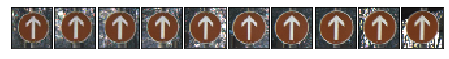

--------------------------------------------------------------------------------------

Class 36:  390 samples
[35778, 35779, 35780, 35781, 35782, 35783, 35784, 35785, 35786, 35787, 35788]


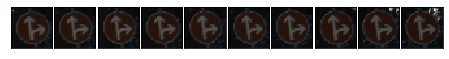

--------------------------------------------------------------------------------------

Class 37:  210 samples
[35988, 35989, 35990, 35991, 35992, 35993, 35994, 35995, 35996, 35997, 35998]


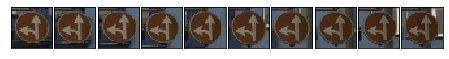

--------------------------------------------------------------------------------------

Class 38:  2070 samples
[38058, 38059, 38060, 38061, 38062, 38063, 38064, 38065, 38066, 38067, 38068]


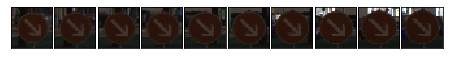

--------------------------------------------------------------------------------------

Class 39:  300 samples
[38358, 38359, 38360, 38361, 38362, 38363, 38364, 38365, 38366, 38367, 38368]


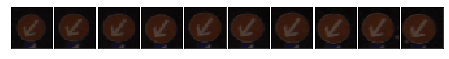

--------------------------------------------------------------------------------------

Class 40:  360 samples
[38718, 38719, 38720, 38721, 38722, 38723, 38724, 38725, 38726, 38727, 38728]


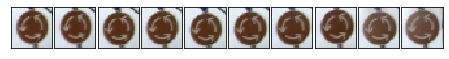

--------------------------------------------------------------------------------------

Class 41:  240 samples
[38958, 38959, 38960, 38961, 38962, 38963, 38964, 38965, 38966, 38967, 38968]


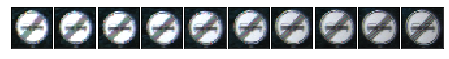

--------------------------------------------------------------------------------------

Class 42:  240 samples
[39198, 39199, 39200, 39201, 39202, 39203, 39204, 39205, 39206, 39207, 39208]


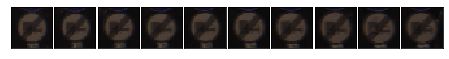

--------------------------------------------------------------------------------------



In [282]:
# for each class count its number of samples and plot 10 random images
x = 0
for c_index, c_count in zip(class_indices, class_counts):
    x += c_count
    print("Class %i:  %s samples" % (c_index, str(c_count)))
    fig = plt.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = list(range(x-11,x))
    print(random_indices)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X[random_indices[i]])
    plt.show()
    print("--------------------------------------------------------------------------------------\n")

### Spliting the data into train and validation sets

In [283]:
#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [284]:
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]

(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]



In [285]:
#Normalizing Data
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255

#Using one hote encoding for the train and validation labels

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

<h2>VGG 16 Architecture</h2>

In [323]:
# Import the VGG16 library as shown bealow and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape = X_train.shape[1:], weights='imagenet', include_top=False)

In [324]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [325]:
f = Flatten()(vgg16.output)

In [326]:
d = Dense(258, activation = "relu")(f)

In [327]:
output_layer = Dense(43, activation='softmax')(d)

In [328]:
# create a model object
CNN_VGG16_model = Model(inputs=vgg16.input, outputs=output_layer)

In [329]:
CNN_VGG16_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [292]:
# tell the model what cost and optimization method to use
CNN_VGG16_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

<h2>Training the model</h2>

In [293]:
epochs = 20
history = CNN_VGG16_model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/20
981/981 [==============================] - 150s 152ms/step - loss: 2.1941 - accuracy: 0.3868 - val_loss: 1.7605 - val_accuracy: 0.5064
Epoch 2/20
981/981 [==============================] - 145s 147ms/step - loss: 1.6055 - accuracy: 0.5354 - val_loss: 1.4979 - val_accuracy: 0.5663
Epoch 3/20
981/981 [==============================] - 144s 147ms/step - loss: 1.4021 - accuracy: 0.5952 - val_loss: 1.3560 - val_accuracy: 0.6097
Epoch 4/20
981/981 [==============================] - 146s 149ms/step - loss: 1.2765 - accuracy: 0.6321 - val_loss: 1.2583 - val_accuracy: 0.6309
Epoch 5/20
981/981 [==============================] - 148s 151ms/step - loss: 1.1844 - accuracy: 0.6603 - val_loss: 1.1911 - val_accuracy: 0.6498
Epoch 6/20
981/981 [==============================] - 155s 158ms/step - loss: 1.1145 - accuracy: 0.6794 - val_loss: 1.1304 - val_accuracy: 0.6735
Epoch 7/20
981/981 [==============================] - 148s 150ms/step - loss: 1.0576 - accuracy: 0.6988 - val_loss: 1.0828 -

### Display of the accuracy and the loss values

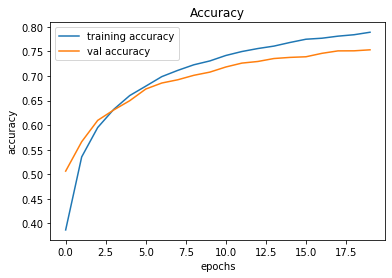

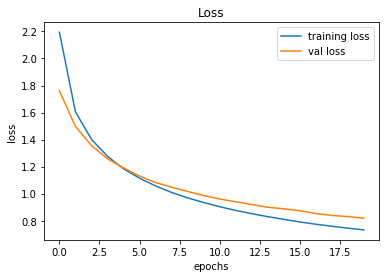

In [294]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## Predicting the Test Data

In [312]:
#Predicting with the test data
y_test=pd.read_csv("dataset/Test.csv")
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('dataset/Test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 


In [313]:
pred = CNN_VGG16_model.predict(X_test) 
classes_pred =np.argmax(pred,axis=1)

## Accuracy

In [314]:
#Accuracy on the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, classes_pred)

0.5298495645288994

<h2>Trying another Dense neural network architecture</h2>

In [315]:
CNN_model = Sequential()
CNN_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
CNN_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
CNN_model.add(MaxPool2D(pool_size=(2, 2)))
CNN_model.add(Dropout(rate=0.25))
CNN_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
CNN_model.add(MaxPool2D(pool_size=(2, 2)))
CNN_model.add(Dropout(rate=0.25))
CNN_model.add(Flatten())
CNN_model.add(Dense(256, activation='relu'))
CNN_model.add(Dropout(rate=0.5))
CNN_model.add(Dense(43, activation='softmax'))

#Compilation of the model
CNN_model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [322]:
CNN_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 conv2d_77 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_78 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                

In [316]:
epochs = 10
history2 = CNN_model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

Epoch 1/10
981/981 [==============================] - 71s 71ms/step - loss: 1.2346 - accuracy: 0.6500 - val_loss: 0.2052 - val_accuracy: 0.9422
Epoch 2/10
981/981 [==============================] - 70s 71ms/step - loss: 0.2627 - accuracy: 0.9191 - val_loss: 0.0881 - val_accuracy: 0.9755
Epoch 3/10
981/981 [==============================] - 71s 73ms/step - loss: 0.1642 - accuracy: 0.9502 - val_loss: 0.0538 - val_accuracy: 0.9852
Epoch 4/10
981/981 [==============================] - 69s 70ms/step - loss: 0.1245 - accuracy: 0.9622 - val_loss: 0.0545 - val_accuracy: 0.9832
Epoch 5/10
981/981 [==============================] - 67s 68ms/step - loss: 0.1109 - accuracy: 0.9661 - val_loss: 0.0375 - val_accuracy: 0.9892
Epoch 6/10
981/981 [==============================] - 66s 67ms/step - loss: 0.0835 - accuracy: 0.9735 - val_loss: 0.0353 - val_accuracy: 0.9906
Epoch 7/10
981/981 [==============================] - 73s 75ms/step - loss: 0.0781 - accuracy: 0.9758 - val_loss: 0.0356 - val_accuracy:

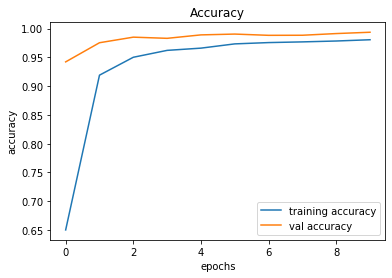

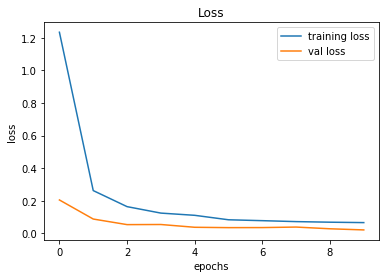

In [317]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history2.history['accuracy'], label='training accuracy')
plt.plot(history2.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history2.history['loss'], label='training loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [320]:
pred = CNN_model.predict(X_test) 
classes_pred2 =np.argmax(pred,axis=1)

In [321]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, classes_pred2)

0.9660332541567695

<h3>Saving the models</h3>

In [332]:
CNN_model.save('CNN_model.h5')